# Auto encoders



![Encoder_picture.png](Encoder_picture.png)

In [54]:
import torchvision.datasets as datasets
from torch import nn
from torchvision.transforms import Compose, Resize, ToTensor, ColorJitter, CenterCrop, Grayscale, Normalize
import torch.nn.functional as F
from torch import optim


mnist_trainset = datasets.MNIST(root='./MNSIT', train=True, download=True, transform=Compose([Resize(size=28),
                                                                                     ToTensor()]))

mnist_testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=None)

train_dataLoader = torch.utils.data.DataLoader(mnist_trainset, batch_size=32, shuffle=False, num_workers=1)

images, labels = next(iter(train_dataLoader))


'''
print(images.shape)

print(images.view(4,784).shape)

plt.imshow(images[2].reshape(28,28), cmap="gray")

test = images[0].reshape(784)

yo = torch.tensor([[25., 40., 6., 4., 25.],
                  [30., 35., 6., 4., 25.],
                  [25., 40., 10., 0., 25.],
                  [25., 40., 10., 20., 5.]])


print(yo.sum(dim=1))

yo = (yo.T / yo.sum(dim=1)).T

print(yo)




print(test.size())

'''

'\nprint(images.shape)\n\nprint(images.view(4,784).shape)\n\nplt.imshow(images[2].reshape(28,28), cmap="gray")\n\ntest = images[0].reshape(784)\n\nyo = torch.tensor([[25., 40., 6., 4., 25.],\n                  [30., 35., 6., 4., 25.],\n                  [25., 40., 10., 0., 25.],\n                  [25., 40., 10., 20., 5.]])\n\n\nprint(yo.sum(dim=1))\n\nyo = (yo.T / yo.sum(dim=1)).T\n\nprint(yo)\n\n\n\n\nprint(test.size())\n\n'

In [55]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 50)
        torch.nn.init.xavier_uniform_(self.fc1.weight, gain=1.0)
        self.fc2 = nn.Linear(50, 2)
        torch.nn.init.xavier_uniform_(self.fc2.weight, gain=1.0)
        self.fc3 = nn.Linear(2, 784)
        torch.nn.init.xavier_uniform_(self.fc3.weight, gain=1.0)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x
    
    

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net()
model.to(device);
loss_fn = nn.functional.mse_loss 
optimizer = optim.Adam(model.parameters(), lr=0.001)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


KeyboardInterrupt: 

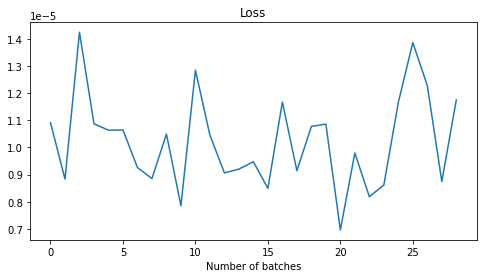

In [59]:
# Create figure for plotting
fig, ax = plt.subplots(figsize=(8,4))
plt.ion()
plot_interval = 1


# Create arrays to save all of the metrics throughout training
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Train the model
for epoch in range(800):
    print(epoch)
    for i, (b_x, b_y) in enumerate(train_dataLoader):
        print(i)
        # Compute predictions and loss
        b_x, b_y = b_x.to(device), b_y.to(device)
        
        b_x = b_x.view(-1,784)
        #print(b_x.shape)
        
        b_x = (b_x.T / b_x.sum(dim=1)).T  # Normalize
        
        pred = model(b_x)
        loss = loss_fn(pred, b_x)
    
        # Back-propagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Compute metrics
        #hard_preds = pred.argmax(dim=1)
        #n_correct = torch.sum(pred.argmax(dim=1) == b_y).item()
        #val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fn)
        
        # Save them in the arrays
        train_losses.append(loss.item())
        #val_losses.append(val_avg_loss)
        #train_accs.append(n_correct/len(b_x))
        #val_accs.append(val_accuracy)
        
        if i % plot_interval == 0:
            # Update plots
            ax.clear()
            ax.plot(train_losses)
            #ax[0].plot(val_losses)

            #ax[1].clear()
            #ax[1].plot(train_accs)
            #ax[1].plot(val_accs)

            # Add legends and labels
            ax.set_title('Loss')
            ax.set_xlabel('Number of batches')
            #ax[0].legend(['Train', 'Validation'])

            #ax[1].set_title('Accuracy')
            #ax[1].set_xlabel('Number of batches')
            #ax[1].legend(['Train', 'Validation'])
            #ax[1].set_ylim([0,1])

            # Draw the figure on the screen
            fig.canvas.draw()

### Analysis

0it [00:00, ?it/s]

170500096it [05:32, 512848.91it/s]                                


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


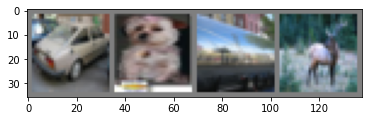

  car   dog truck  deer


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./CIFAR', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))